# Метод ломаных и метод сопряженных градиентов

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Одномерная оптимизация

Методом ломанных найти минимум $f^*$ функции $f(x) = (x - 0,9)^2 + (x - 1,1)^4$ на отрезке $x \in [0,8; 1,2]$ с точностью $\epsilon = 0,05$.

In [2]:
def Lipschitz_Сonstant(a, b):
    
    L = 0
    x = np.linspace(a, b, 1000)
    
    for i in range(len(x) - 1):
        
        x1 = x[i]
        x2 = x[i + 1]
        
        L_tmp = abs(f(x1) - f(x2)) / abs(x1 - x2)
        
        if L_tmp > L:
            L = L_tmp
            
    return L

In [3]:
def Broken_Line_Method(f):        
    
    a, b = 0.8, 1.2
    eps = 0.05
    L = Lipschitz_Сonstant(a, b) # постоянная Липшица
    x = np.linspace(a, b, 10) # 10 точек испытаний
    y = [f(i) for i in x] # значение функции в этих точках
        
    while True:      
        
        y_min = min(y) # минимум функции в точках испытаний
        x_min = x[0]
        min_val = y[0]
        min_index = 0
        
        for i in range(len(x) - 1):
            
            # значение х в точках пересечения соседних ветвей миноранты:
            x_mean = (y[i] - y[i+1] + L * (x[i] + x[i+1])) / (2 * L) 
            # значение у в точках пересечения соседних ветвей миноранты:
            y_mean = y[i] - L * (x_mean - x[i])
            
            # поиск точки минимума миноранты:
            if y_mean < min_val:                
                min_val = y_mean
                min_index = i
                x_min = x_mean
        
        # точка минимума миноранты:
        x_minorant = x_min

        # добавляем точку минимума миноранты и её значение к точкам испытаний:
        x = np.concatenate((x[:min_index + 1], [x_minorant], x[min_index + 1:]))
        # добавляем значение миноранты к точкам испытаний:
        y = np.concatenate((y[:min_index + 1], [f(x_minorant)], y[min_index + 1:]))
        
        # условие остановки:
        if np.abs(y_min - f(x_minorant)) <= eps:
            return x_minorant, x, L

In [4]:
# исходная функция:
def f(x):
    return (x - 0.9) ** 2 + (x - 1.1) ** 4

x_min, xx, L = Broken_Line_Method(f)
print('х* = ', x_min)
print('f* = ', f(x_min))

х* =  0.9112991890803699
f* =  0.001395601055981526


In [5]:
x = np.linspace(0.8, 1.2, 100)
min(f(x))

0.0013918312288221993

In [6]:
# ломаные:
lines_x = []
lines_y = []
values = f(xx)

for i in range(len(xx) - 1):
    
    x = xx[i]
    y = f(x)
    
    x_mean = (values[i] - values[i+1] + L * (xx[i] + xx[i+1])) / (2 * L)
    y_mean = values[i] - L * (x_mean - xx[i])
    
    lines_x.append(x)
    lines_x.append(x_mean)
    lines_y.append(y)
    lines_y.append(y_mean)

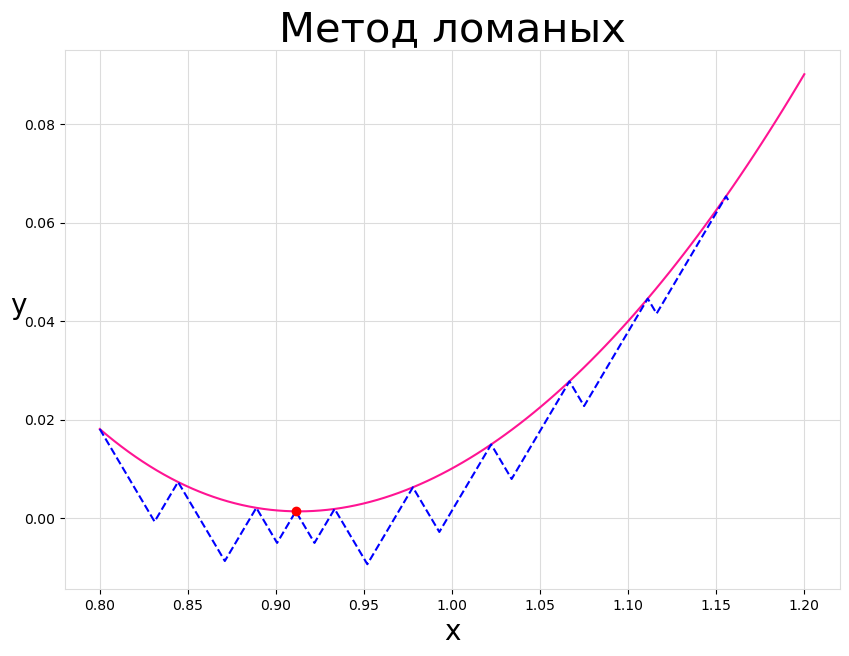

In [7]:
# изобразим метод ломаных на графике:
fig, ax = plt.subplots(figsize=(10, 7))
x = np.linspace(0.8, 1.2, 100)
y = f(x)

ax.plot(x, y,  color='DeepPink')
ax.plot(lines_x, lines_y,  '--', color='blue')
ax.plot(x_min, f(x_min), 'o', color='red')

ax.set_title('Метод ломаных', fontsize = 30)
ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20, rotation = 'horizontal')
ax.grid(color = 'gainsboro')
ax.spines['right'].set_color('gainsboro')
ax.spines['top'].set_color('gainsboro')
ax.spines['left'].set_color('gainsboro')
ax.spines['bottom'].set_color('gainsboro')

### 2. Многомерная оптимизация (безусловная)

Методом сопряжённых градиентов минимизировать функцию $f(x) = 4x_1^2 +4x_1x_2 + 6x_2^2-17x_1$

In [8]:
def function(x, y):
    return 4 * x ** 2 + 4 * x * y + 6 * y ** 2 - 17 * x

$\nabla f(x) = (8x_1+4x_2-17, 4x_1+12x_2)$

In [9]:
def Gradient(x, y):
    return np.array([8 * x + 4 * y - 17, 4 * x + 12 * y])

### Поиск $\alpha$ с помощью метода ломаных

In [10]:
# функция, зависящая от альфа
def f(x0, y0, hx0, hy0, a):
    return 4 * (x0 + a * hx0) ** 2 + 4 * (x0 + a * hx0) * (y0 + a * hy0) + 6 * (y0 + a * hy0) ** 2 - 17 * (x0 + a * hx0)

# функция для поиска альфа, зависящая от парам☼тра
def ff(a):
    return f(x0, y0, hx0, hy0, a)

In [11]:
def Search_Alpha(a, b):
    
    L = 0
    x = np.linspace(a, b, 1000)
    y = [ff(i) for i in x]
    
    for i in range(len(x) - 1):
        
        x1 = x[i]
        x2 = x[i + 1]
        
        L_tmp = abs(ff(x1) - ff(x2)) / abs(x1 - x2)
        
        if L_tmp > L:
            L = L_tmp
            
    while True:      
        
        y_min = min(y) # минимум функции в точках иcпытаний
        x_min = x[0]
        min_val = y[0]
        min_index = 0
        
        for i in range(len(x) - 1):
            
            # значение х в точках пересечения соседних ветвей миноранты:
            x_mean = (y[i] - y[i+1] + L * (x[i] + x[i+1])) / (2 * L) 
            # значение у в точках пересечения соседних ветвей миноранты:
            y_mean = y[i] - L * (x_mean - x[i])
            
            # поиск точки минимума миноранты:
            if y_mean < min_val:                
                min_val = y_mean
                min_index = i
                x_min = x_mean
        
        # точка минимума миноранты:
        x_minorant = x_min

        # добавляем точку минимума миноранты и её значение к точкам испытаний:
        x = np.concatenate((x[:min_index + 1], [x_minorant], x[min_index + 1:]))
        # добавляем значение миноранты к точкам испытаний:
        y = np.concatenate((y[:min_index + 1], [ff(x_minorant)], y[min_index + 1:]))
        
        # условие остановки:
        if np.abs(y_min - ff(x_minorant)) <= 1e-3:
            return x_minorant

## Метод сопряженных градиентов

Задаём $ x^0 $, $ h_0 = -f'(x^0) $

**1) Если $ k + 1 $ кратно количеству переменных**, то: 

$$ \alpha_k = arg\min_{\alpha}f(x^k + \alpha h_k) $$

$x^{k+1} = x^k + \alpha_kh_k$

$ h_{k+1} = -f'(x^{k+1}) $

**2) Иначе**:
$$ \alpha_k = arg\min_{\alpha}f(x^k + \alpha h_k) $$

$x^{k+1} = x^k + \alpha_kh_k$

$ \beta_k = \frac{\parallel f'(x^{k+1}) \parallel ^2}{\parallel f'(x^k) \parallel ^2} $


$ h_{k+1} = -f'(x_{k+1}) + \beta_kh_k $

**3) Проверка критической остановки**: $ \parallel f'(x^{k+1}) \parallel < 10^{-3} $. 

Если условие выполнено, то конец. 

Если условие не выполнено, то $ k = k + 1 $ и повторяем пункт 1) или 2).

In [12]:
x0, y0 = 0, -3 # задём начальную точку
hx0, hy0 = -Gradient(x0, y0) # антиградиент
k = 0 # количество итераций 
steps = [] # сюда записываем координаты шагов
steps.append([x0, y0])

# пока не выполнилось условие остановки
while np.sqrt(Gradient(x0, y0)[0] ** 2 + Gradient(x0, y0)[1] ** 2) > 0.0001:

    k += 1

    # если  k+1 кратно количеству переменных, то
    if k % 2 == 0:

        alpha = Search_Alpha(a = 0, b = 1) # ищем оптимальное alpha

        # вычисляем x_k+1 = x_k + alpha_k * h_k
        x1 = x0 + alpha * hx0
        y1 = y0 + alpha * hy0

        # вычисляем антиградиент в новой точке
        hx1 = -Gradient(x1, y1)[0]
        hy1 = -Gradient(x1, y1)[1]

    # иначе
    else:
        alpha = Search_Alpha(a = 0, b = 1) # ищем оптимальное alpha

        # вычисляем x_k+1 = x_k + alpha_k * h_k
        x1 = x0 + alpha * hx0
        y1 = y0 + alpha * hy0

        # вычисляем beta
        beta_numerator = Gradient(x1, y1)[0] ** 2 + Gradient(x1, y1)[1] ** 2 # числитель beta
        beta_denominator = Gradient(x0, y0)[0] ** 2 + Gradient(x0, y0)[1] ** 2 # знаменатель beta
        beta = beta_numerator / beta_denominator

        # вычисляем антиградиент в новой точке
        hx1 = -Gradient(x1, y1)[0] + hx0 * beta
        hy1 = -Gradient(x1, y1)[1] + hy0 * beta

    # добавляем координаты нового шага
    x0 = x1
    y0 = y1
    steps.append([x0, y0])

    # обновляем hx0 и hy0 для новой итерации
    hx0 = hx1
    hy0 = hy1

In [13]:
def Show_Function():
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d') 
    
    x = list(np.linspace(-1, 5, 100))
    y = list(np.linspace(-4, 2, 100))
    x, y = np.meshgrid(x, y)
    z = function(x, y)
    
    a = ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap='plasma')
    fig.colorbar(a, ax = ax, shrink = 0.5, aspect = 10) 
    ax.set_xlabel('x1', fontsize = 12, labelpad=10)
    ax.set_ylabel('x2', fontsize = 12, labelpad=10)
    
    return x, y, z

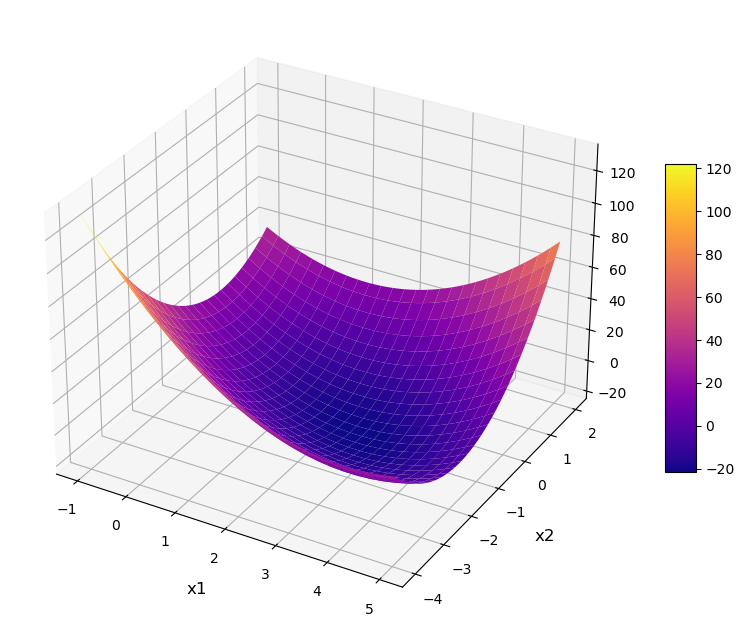

In [14]:
x, y, z = Show_Function()

In [15]:
def Contour_Plot(x, y, z, steps=None):
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    
    ax[0].contourf(x, y, z, 11, cmap='plasma')
    ax[0].set_xlabel('x1', fontsize = 20, labelpad=10)
    ax[0].set_ylabel('x2', fontsize = 20, labelpad=20, rotation = 'horizontal')
    ax[0].set_title('Contour plot', fontsize = 20)
    
    cp = ax[1].contour(x, y, z, 17, cmap='plasma', linestyles='solid')
    ax[1].clabel(cp, inline=1, fontsize=10)
    ax[1].set_xlabel('x1', fontsize = 20, labelpad=10)
    ax[1].set_ylabel('x2', fontsize = 20, labelpad=20, rotation = 'horizontal')
    ax[1].set_title('Contour plot', fontsize = 20)
    
    if steps is not None:
        steps = np.matrix(steps)
        ax[0].plot(steps[:,0], steps[:,1], '-o', color='white')
        ax[1].plot(steps[:,0], steps[:,1], '-o', color='DeepPink')

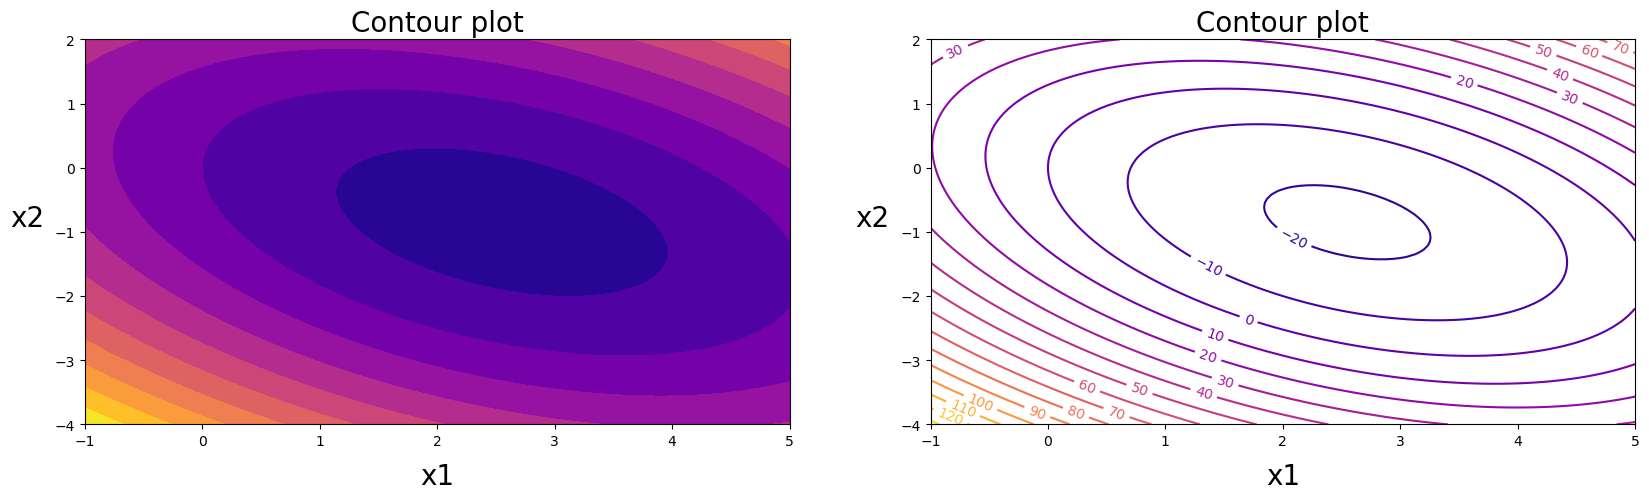

In [16]:
Contour_Plot(x, y, z)

In [17]:
print(f'k = {k} \nx1 = {x0} \nx2 = {y0} \nf* = {function(x0, y0)}')

k = 6 
x1 = 2.550000045380197 
x2 = -0.8500000733600297 
f* = -21.67499999999997


In [18]:
def Show_Trajectory():
    
    x = list(np.linspace(-1, 5, 100))
    y = list(np.linspace(-4, 2, 100))
    x, y = np.meshgrid(x, y)
    z = function(x, y)
    
    Contour_Plot(x, y, z, steps)

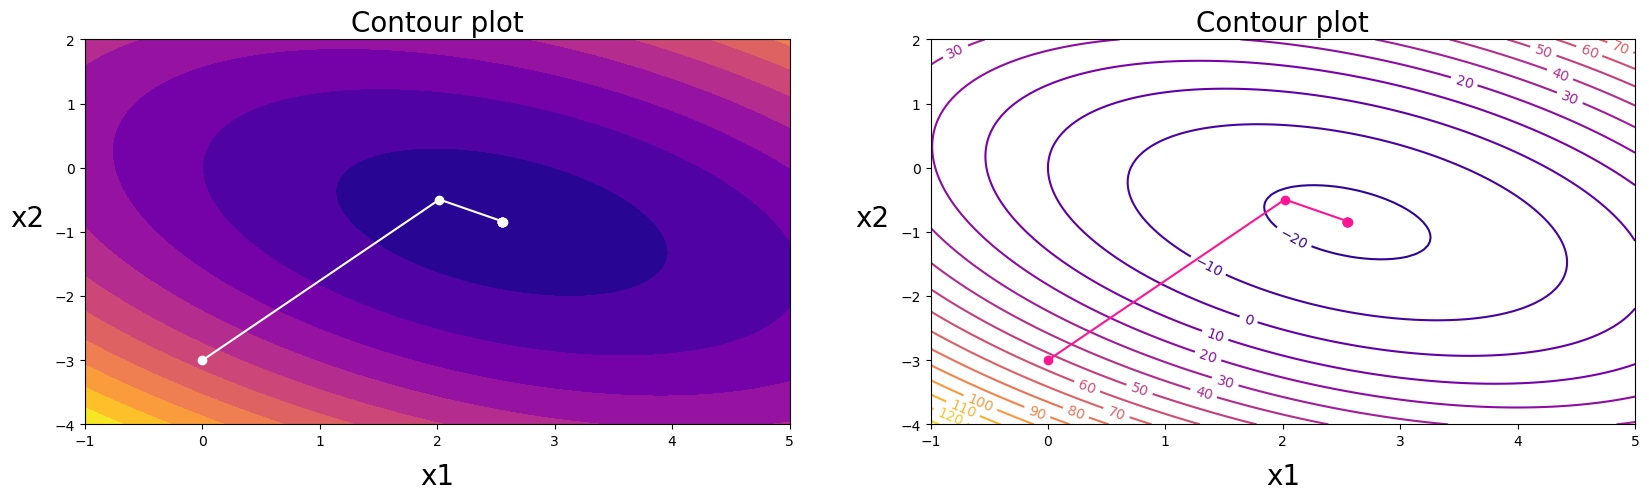

In [19]:
Show_Trajectory()